# Comparison of PMP and CNN

In [53]:
%reload_ext autoreload
%autoreload 2
dir_data = '../data/power_consumption/'

In [54]:
import numpy as np
import matplotlib.pyplot as plt

In [55]:
rmse_dpm = np.load(dir_data+'rmse/rmse_dpm.npy')
rmse_wpm = np.load(dir_data+'rmse/rmse_wpm.npy')
rmse_ypm = np.load(dir_data+'rmse/rmse_ypm.npy')
rmse_ptm = np.load(dir_data+'rmse/rmse_ptm.npy')
rmse_ptu = np.load(dir_data+'rmse/rmse_ptu.npy')
rmse_tfm = np.load(dir_data+'rmse/rmse_tfm.npy')
rmse_tfu = np.load(dir_data+'rmse/rmse_tfu.npy')
# and others

In [56]:
n_timestep = rmse_wpm.shape

In [ ]:
# create ensemble

In [57]:
rmse_ensemble_all = np.mean([rmse_dpm, rmse_wpm, rmse_ypm, rmse_ptm, rmse_ptu, rmse_tfm, rmse_tfu], axis=0)
rmse_ensemble_pmp = np.mean([rmse_dpm, rmse_wpm, rmse_ypm], axis=0)
rmse_ensemble_cnn = np.mean([rmse_ptm, rmse_ptu, rmse_tfm, rmse_tfu], axis=0)

## Plotting

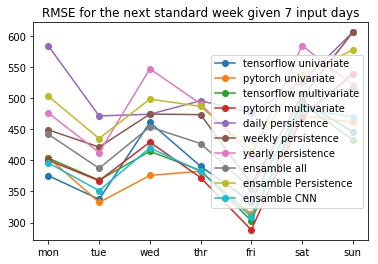

In [58]:
# plot scores
days = ['mon', 'tue', 'wed', 'thr', 'fri', 'sat', 'sun']
plt.plot(days, rmse_tfu, marker='o', label='tensorflow univariate')
plt.plot(days, rmse_ptu, marker='o', label='pytorch univariate')
plt.plot(days, rmse_tfm, marker='o', label='tensorflow multivariate')
plt.plot(days, rmse_ptm, marker='o', label='pytorch multivariate')
plt.plot(days, rmse_dpm, marker='o', label='daily persistence')
plt.plot(days, rmse_wpm, marker='o', label='weekly persistence')
plt.plot(days, rmse_ypm, marker='o', label='yearly persistence')
plt.plot(days, rmse_ensemble_all, marker='o', label='ensamble all')
plt.plot(days, rmse_ensemble_pmp, marker='o', label='ensamble Persistence')
plt.plot(days, rmse_ensemble_cnn, marker='o', label='ensamble CNN')
plt.legend()
plt.title('RMSE for the next standard week given %s input days' %  n_timestep)
plt.show()